In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [22]:
img_list = ['result/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1/acc_of_each_data.png']
display_fig(img_list, width=[400])

In [8]:
def plot_acc_of_each_data(working_dir):
    r'''绘制一个实验中具体类型数据的acc随epoch变化的曲线'''
    acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
    train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npy')
    test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npy')

    args = read_json_data(f'{working_dir}/config.json')
    args = argparse.Namespace(**args)

    fig = plt.figure(figsize=(12, 8))
    format_settings(bottom=0.16, left=0.22, right=0.82, fs=40, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

    plt.rcParams['axes.spines.top'] = False
    
    ax = plt.gca()

    # 首先从一个色系中挑选颜色
    data_show_index = np.nonzero(args.data_show)[0]
    data_color_list = get_color_list(n_colors=3, cmap='viridis', color_min=0, color_max=1)
    
    # labels = [r'prompt=3, $x\in I_1$ (seen)', r'prompt=3, $x\in I_2$', r'prompt=4, $x\in I_1$', r'prompt=4, $x\in I_2$ (seen)']

    train_3x_to_x_probability = train_acc_his[:, 0]
    test_3x_to_x_probability = test_acc_his[:, 0]
    output_x_train = train_acc_his[:, 1]
    output_x_test = test_acc_his[:, 1]
    output_x_plus_1_train = train_acc_his[:, 2]
    output_x_plus_1_test = test_acc_his[:, 2]

    ax2 = ax.twinx()

    ax.plot(acc_epoch_his, train_3x_to_x_probability, label=f'train', color='tomato', alpha=0.75, \
            marker = 'o', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=10)
    # ax.plot(acc_epoch_his, test_3x_to_x_probability, label=f'test', color=data_color_list[0], alpha=0.75, \
    #         marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
    ax2.plot(acc_epoch_his, output_x_train, label=r'$p$(train data 3x to x)', color=data_color_list[1], alpha=0.75, \
            marker = '^', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_test, label=r'$p$(test data 3x to x)', color=data_color_list[1], alpha=0.75, \
            marker = 'X', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_plus_1_train, label=r'$p$(train data 3x to x+1)', color=data_color_list[2], alpha=0.75, \
            marker = '^', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_plus_1_test, label=r'$p$(test data 3x to x+1)', color=data_color_list[2], alpha=0.75, \
            marker = 'X', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)

    
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles = handles1 + handles2
    labels = labels1 + labels2
    
    ax.set_xlabel('Epoch', labelpad=10)
    ax.set_ylabel('Accuracy')
    ax2.set_ylabel('Probability', labelpad=20, rotation=270)

    ax.set_xticks([0, 2000, 4000])
    ax.set_xticklabels([0, 2000, 4000])

    ax.set_yticks([0.2, 0.6, 1.0])
    ax.set_yticklabels(['20%', '60%', '100%'])

    ax2.set_yticks([0.2, 0.6, 1.0])
    ax2.set_yticklabels(['20%', '60%', '100%'])

    ax.set_ylim([-0.02, 1.05])
    ax2.set_ylim([-0.02, 1.05])

    plt.legend(handles, labels, loc=(0.08, 0.12), fontsize=27)

    plt.savefig(f'{working_dir}/acc_of_each_data.png', dpi=300)
    print(f'saved at {working_dir}/acc_of_each_data.png')

saved at ../result_2023/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1/acc_of_each_data.png


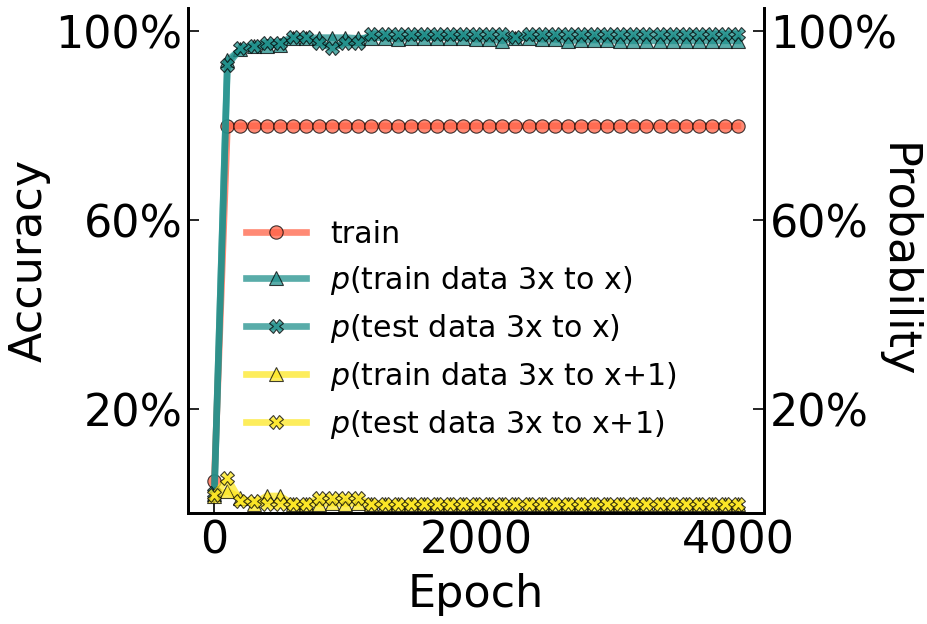

In [9]:
working_dir = '../result_2023/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1'
plot_acc_of_each_data(working_dir)

In [23]:
['3x_to_x_seen', '3x_to_x_unseen', '3x_to_x+1_seen', '3x_to_x+1_unseen']


def plot_acc_of_each_data2(working_dir):
    r'''绘制一个实验中具体类型数据的acc随epoch变化的曲线'''
    acc_epoch_his, train_acc_his, test_acc_his = load_acc(working_dir)

    args = read_json_data(f'{working_dir}/config.json')
    args = argparse.Namespace(**args)

    fig = plt.figure(figsize=(12, 8))
    format_settings(bottom=0.18, left=0.22, right=0.82, fs=40, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

    plt.rcParams['axes.spines.top'] = False
    
    ax = plt.gca()

    # 首先从一个色系中挑选颜色
    data_show_index = np.nonzero(args.data_show)[0]
    data_color_list = get_color_list(n_colors=3, cmap='viridis', color_min=0, color_max=1)

    print(np.shape(train_acc_his))

    train_3x_to_x_probability = (train_acc_his[:, 0] * 4 + train_acc_his[:, 2] * 1) / 5
    
    output_x_train = train_acc_his[:, 1]
    output_x_test = test_acc_his[:, 1]
    output_x_plus_1_train = train_acc_his[:, 3]
    output_x_plus_1_test = test_acc_his[:, 3]

    ax2 = ax.twinx()

    ax.plot(acc_epoch_his, train_3x_to_x_probability, label=f'train', color='tomato', alpha=0.75, \
            marker = 'o', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=10)
    # ax.plot(acc_epoch_his, test_3x_to_x_probability, label=f'test', color=data_color_list[0], alpha=0.75, \
    #         marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
    ax2.plot(acc_epoch_his, output_x_train, label=r'$p$(seen content output x)', color=data_color_list[1], alpha=0.75, \
            marker = '^', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_test, label=r'$p$(unseen content output x)', color=data_color_list[1], alpha=0.75, \
            marker = 'X', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_plus_1_train, label=r'$p$(seen content output x+1)', color=data_color_list[2], alpha=0.75, \
            marker = '^', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)
    ax2.plot(acc_epoch_his, output_x_plus_1_test, label=r'$p$(unseen content x+1)', color=data_color_list[2], alpha=0.75, \
            marker = 'X', markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=6)

    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles = handles1 + handles2
    labels = labels1 + labels2
    
    ax.set_xlabel('Epoch', labelpad=20)
    ax.set_ylabel('Test Accuracy')
    ax2.set_ylabel('Probability', labelpad=20, rotation=270)

    ax.set_xticks([0, 2000, 4000])
    ax.set_xticklabels([0, 2000, 4000])

    ax.set_yticks([0.2, 0.6, 1.0])
    ax.set_yticklabels(['20%', '60%', '100%'])

    ax2.set_yticks([0.2, 0.6, 1.0])
    ax2.set_yticklabels(['20%', '60%', '100%'])

    ax.set_ylim([-0.02, 1.05])
    ax2.set_ylim([-0.02, 1.05])

    plt.legend(handles, labels, loc=(0.08, 0.2), fontsize=27)

    plt.savefig(f'{working_dir}/acc_of_each_data.png', dpi=300)
    print(f'saved at {working_dir}/acc_of_each_data.png')

(41, 4)
saved at result/GPT_3x_to_x_or_x+1_依概率输出_未保证x在两个数据中都出现过/3x_to_x_probability-seed_1-N_3000-80概率x_20概率x+1/acc_of_each_data.png


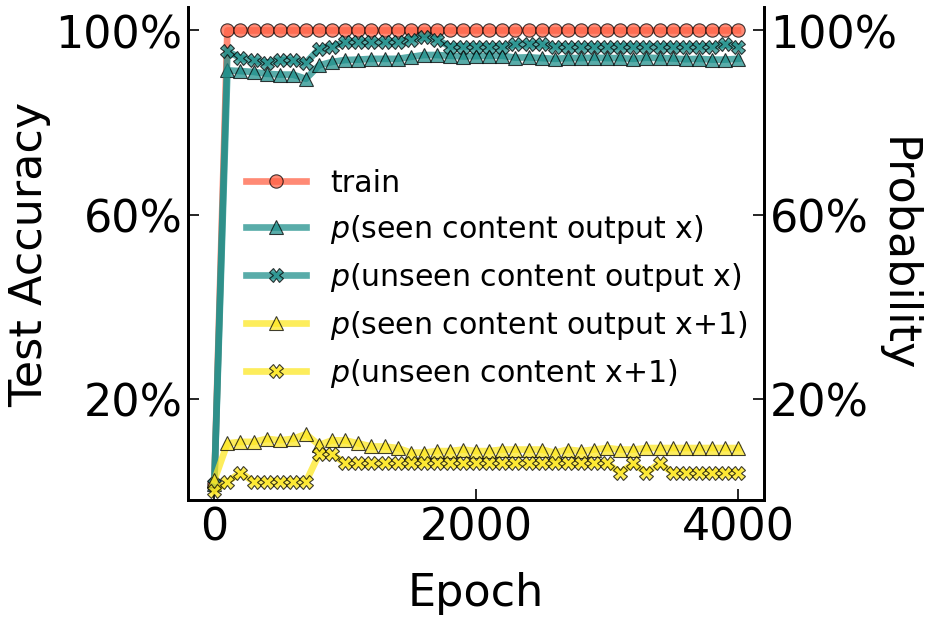

In [24]:
working_dir = 'result/GPT_3x_to_x_or_x+1_依概率输出_未保证x在两个数据中都出现过/3x_to_x_probability-seed_1-N_3000-80概率x_20概率x+1'
plot_acc_of_each_data2(working_dir)

输出的概率随epoch的变化

In [25]:
import torch
from utils import *
from model import *
from data import *

exp_dir = 'result/GPT_3x_to_x_or_x+1_依概率输出'
working_dir = f'{exp_dir}/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1'
# working_dir = f'{exp_dir}/3x_to_x_probability-seed_1-N_180-50概率x_50概率x+1_10L8H'
# working_dir = f'{exp_dir}/3x_to_x_probability-seed_1-N_180-80概率x_19概率x+1_10L8H'
# working_dir = f'{exp_dir}/3x_to_x_probability-seed_1-N_10000-80概率x_19概率x+1_大数据小epoch'

args = load_args(f'{working_dir}/config.json')
args.test_data_size = 10000
args.train_data_size = 10000
# kwargs = {'use_mod_list_specific': True}
# datas = get_data(args, True, **kwargs)

args.target = '3x_to_x'
datas = get_data(args, True)

In [27]:
data = np.array(datas['test_seq_group']['3x_to_x_x+1_probality'][:2000])
# data = np.array(datas['train_seq_group']['3x_to_x_x+1_probality'][:2000])

epoch_list = [0, 100, 200, 400, 800, 1200, 2000, 3999]
# epoch_list 从0到3900，间隔100
epoch_list= np.arange(0, 4000, 100).tolist() + [3999]
# epoch_list = range(100)
p_x_mean_list = []
p_x_std_list = []
p_x_1_mean_list = []
p_x_1_std_list = []

for epoch in epoch_list:
    state_dict=torch.load(f'{working_dir}/model/model_{epoch}.pt')

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    args = load_args(f'{working_dir}/config.json')

    model = myGPT(args, device)
    model.load_state_dict(state_dict)
    model.to(device)


    # 将data直接放入模型中预测
    model.eval()
    outputs, _ = model(torch.tensor(data[:, :-1]).to(device))
    outputs = outputs.detach().cpu().numpy()
    outputs = np.reshape(outputs, (np.size(data, 0), np.size(data, 1)-1, -1))  # (batch_size, seq_len, vocab_size)
    outputs = outputs[:, -1, :]

    # 输出第1和第2大的词的概率之和以及这两个词的index
    p_x_list = []
    p_x_1_list = []
    for i in range(np.size(data, 0)):
        if data[i, -1] != np.argmax(outputs[i, :]):
            pass
            # print('error')
            # print(data[i, -1], np.argmax(outputs[i, :]))
        else:
            out = np.exp(outputs[i, :])
            out = out / np.sum(out)
            p_x_list.append(out[data[i, -1]])
            p_x_1_list.append(out[data[i, -1]+1])

    p_x = np.array(p_x_list)
    p_x_1 = np.array(p_x_1_list)

    p_x = p_x # 计算
    p_x_1 = p_x_1

    # 计算均值方差
    p_x_mean_list.append(np.mean(p_x))
    p_x_1_mean_list.append(np.mean(p_x_1))
    p_x_std_list.append(np.std(p_x))
    p_x_1_std_list.append(np.std(p_x_1))

saved at result/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_1800-80概率x_20概率x+1/p_x_mean.png


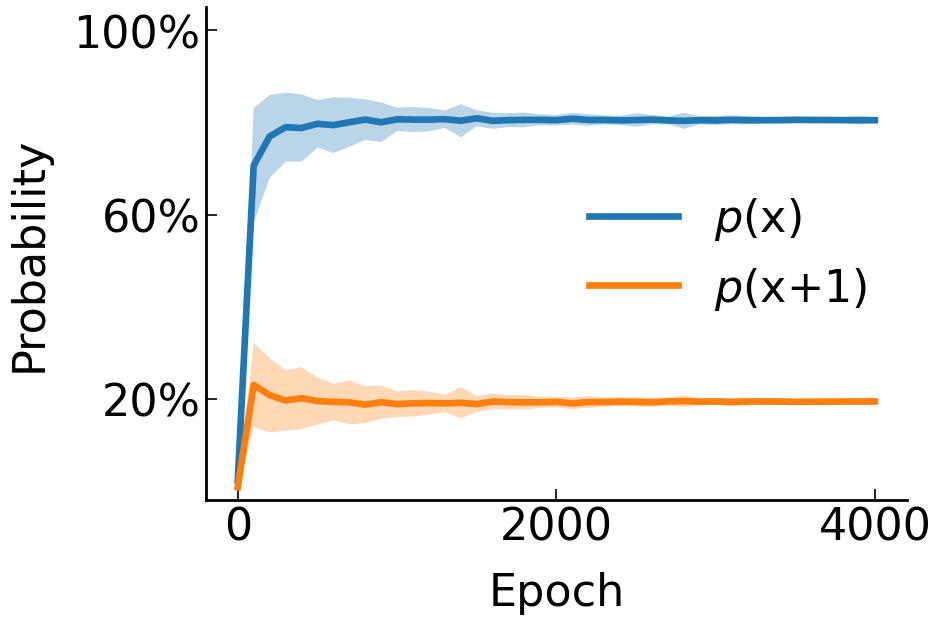

In [33]:
fig = plt.figure(figsize=(12, 8))
format_settings(bottom=0.18, left=0.22, right=0.95, fs=40, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(epoch_list, p_x_mean_list, label=r'$p$(x)')
plt.plot(epoch_list, p_x_1_mean_list, label=r'$p$(x+1)')

# 画区域来表示概率的波动
plt.fill_between(epoch_list, np.array(p_x_mean_list)-np.array(p_x_std_list), np.array(p_x_mean_list)+np.array(p_x_std_list), alpha=0.3)
plt.fill_between(epoch_list, np.array(p_x_1_mean_list)-np.array(p_x_1_std_list), np.array(p_x_1_mean_list)+np.array(p_x_1_std_list), alpha=0.3)

plt.legend(loc='right')

plt.xlabel('Epoch', labelpad=20)
plt.ylabel('Probability', labelpad=20)

plt.xticks([0, 2000, 4000])
plt.yticks([0.2, 0.6, 1.0], ['20%', '60%', '100%'])

plt.ylim([-0.02, 1.05])

plt.savefig(f'{working_dir}/p_x_mean.png', dpi=300)
print(f'saved at {working_dir}/p_x_mean.png')

saved at result/GPT_3x_to_x_or_x+1_依概率输出/3x_to_x_probability-seed_1-N_10000-80概率x_19概率x+1_大数据小epoch/p_x_divide_p_x_1.png


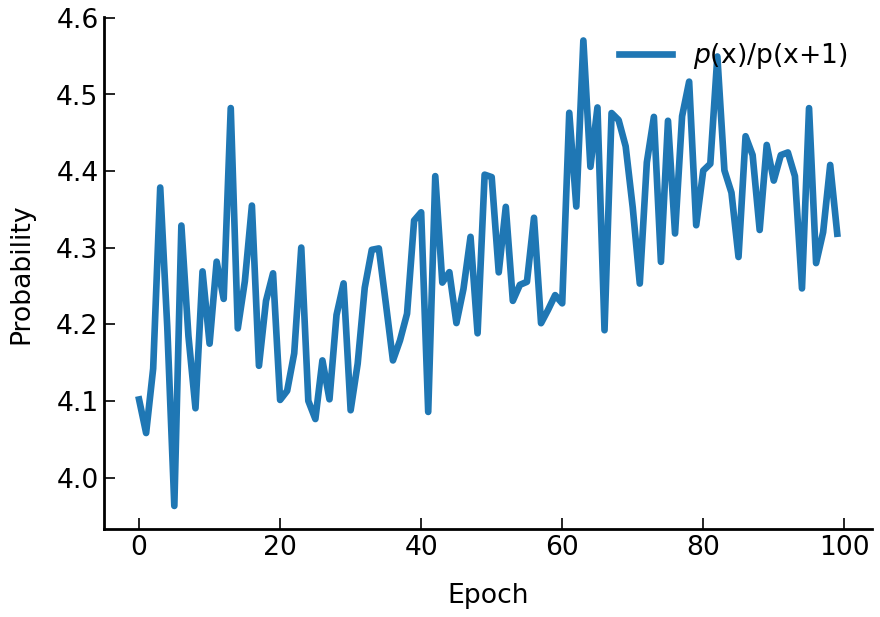

In [4]:
fig = plt.figure(figsize=(12, 8))
format_settings(bottom=0.15, left=0.15, right=0.95, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(epoch_list, np.array(p_x_mean_list)/np.array(p_x_1_mean_list), label=r'$p$(x)/p(x+1)')
# plt.plot(epoch_list, p_x_1_mean_list, label=r'$p$(x+1)')

# # 画区域来表示概率的波动
# plt.fill_between(epoch_list, np.array(p_x_mean_list)-np.array(p_x_std_list), np.array(p_x_mean_list)+np.array(p_x_std_list), alpha=0.3)
# plt.fill_between(epoch_list, np.array(p_x_1_mean_list)-np.array(p_x_1_std_list), np.array(p_x_1_mean_list)+np.array(p_x_1_std_list), alpha=0.3)

plt.legend(loc='upper right')

plt.xlabel('Epoch', labelpad=20)
plt.ylabel('Probability', labelpad=20)

plt.savefig(f'{working_dir}/p_x_divide_p_x_1.png', dpi=300)
print(f'saved at {working_dir}/p_x_divide_p_x_1.png')